In [1]:
import pandas as pd
import numpy as np
from skimage.io import imread, imsave
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage

In [15]:
import os
import random
import pandas as pd
import numpy as np
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
from skimage import img_as_ubyte

path = "img//label/"
file_list = os.listdir(path)
file_list_py = [file[:-3] + 'jpg' for file in file_list if file.endswith(".txt")]


n = len(file_list_py)
numlist = range(0,n)
random.seed(0)
s1 = random.sample(numlist, int(n*0.7))    #랜덤으로 0.7의 비율 만큼 좌우반전할 것 뽑기
# random.seed(1)
s2 = random.sample(numlist, int(n*0.1))    #랜덤으로 0.1의 비율 만큼 노이즈 추가할 것 뽑기

transform = [file_list_py[_] for _ in s1]
noise = [file_list_py[_] for _ in s2]


## 좌우반전
import cv2
for image in transform:
    final_data=[]
    image_path = 'img/2 모닝빵/image6/' + image
    label_path = 'img/2 모닝빵/label/' + image.replace('jpg','txt')
    img = imread(image_path)
    
    
    imsave('img/2 모닝빵/image2/' + image.replace('.jpg', '') + '_trans' + '.jpg',np.fliplr(img))   #좌우반전해서 저장
    
    with open('img/2 모닝빵/label/' + image.replace('.jpg', '') + '.txt', 'r+') as f:
        with open('img/2 모닝빵/label2/' + image.replace('.jpg', '') + '_trans' + '.txt', 'w') as g:
            lines = f.readlines()
            for li in lines:
                list_a = li.split(' ')
                list_a = list(map(float, list_a))
                list_a[1] = 1- list_a[1]
                k = str(int(list_a[0]))+ " " + " ".join([str(_) for _ in list_a[1:]]) +"\n"
                g.write(k)      #bounding box 위치 좌우반전한대로 조정해서 txt파일도 저장
                

# 노이즈
 for image in noise:
    final_data=[]
    image_path = 'img/2 모닝빵/image6/' + image
    label_path = 'img/2 모닝빵/label/' + image.replace('jpg','txt')
    img = imread(image_path)
    
    imsave('img/2 모닝빵/image2/' + image.replace('.jpg', '') + '_noise' +'.jpg',img_as_ubyte(random_noise(img,var=0.2**2)))  #노이즈 추가한 이미지 저장
    
    with open('img/2 모닝빵/label/' + image.replace('.jpg', '') + '.txt', 'r+') as f:
        with open('img/2 모닝빵/label2/' + image.replace('.jpg', '') + '_noise' + '.txt', 'w') as g:
            lines = f.readlines()
            for li in lines:
                g.write(li)     #노이즈 추가해도 bounding box 위치는 그대로이므로 txt파일 저장

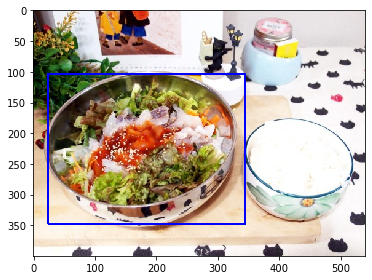

In [9]:
from skimage.io import imshow

img = imread('img/12 회덮밥/images/image1/회덮밥1_146.jpg')
k = open('img/12 회덮밥/labels/label1/회덮밥1_146.txt','r+')
lines = k.readlines()


def showboximage(li, img):
    for li in lines:
        list_a = li.split(' ')
        list_a = list(map(float, list_a))
        img1 = cv2.rectangle(img,(int(img.shape[1]*list_a[1] + img.shape[1]*list_a[3]/2),
                                   int(img.shape[0]*list_a[2] -  img.shape[0]*list_a[3]/2)),
                             (int(img.shape[1]*list_a[1]) - int(img.shape[1]*list_a[3]/2),
                              int(img.shape[0]*list_a[2]) + int(img.shape[0]*list_a[4]/2)),(0,0,255),2)
    imshow(img1)
    
showboximage(lines, img)   #원본이미지

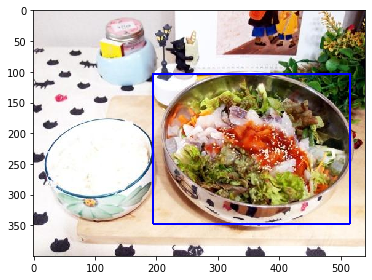

In [10]:
from skimage.io import imshow

img = imread('img/12 회덮밥/images5/회덮밥1_146_trans.jpg')
k = open('img/12 회덮밥/labels5/회덮밥1_146_trans.txt','r+')
lines = k.readlines()
showboximage(lines, img)     #좌우반전한 image와 bounding box

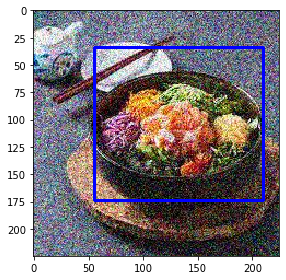

In [15]:
img = imread('img/12 회덮밥/images5/회덮밥36_noise.jpg')
k = open('img/12 회덮밥/labels5/회덮밥36_noise.txt','r+')
lines = k.readlines()
showboximage(lines, img)   #노이즈 추가한 image와 bounding box